C:\Users\cd\AppData\Local\Temp\ipykernel_12904\3010402505.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_2020['month'] = location_2020['확진'].dt.month
C:\Users\cd\AppData\Local\Temp\ipykernel_12904\3010402505.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_2021['month'] = location_2021['확진'].dt.month
C:\Users\cd\AppData\Local\Temp\ipykernel_12904\3010402505.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

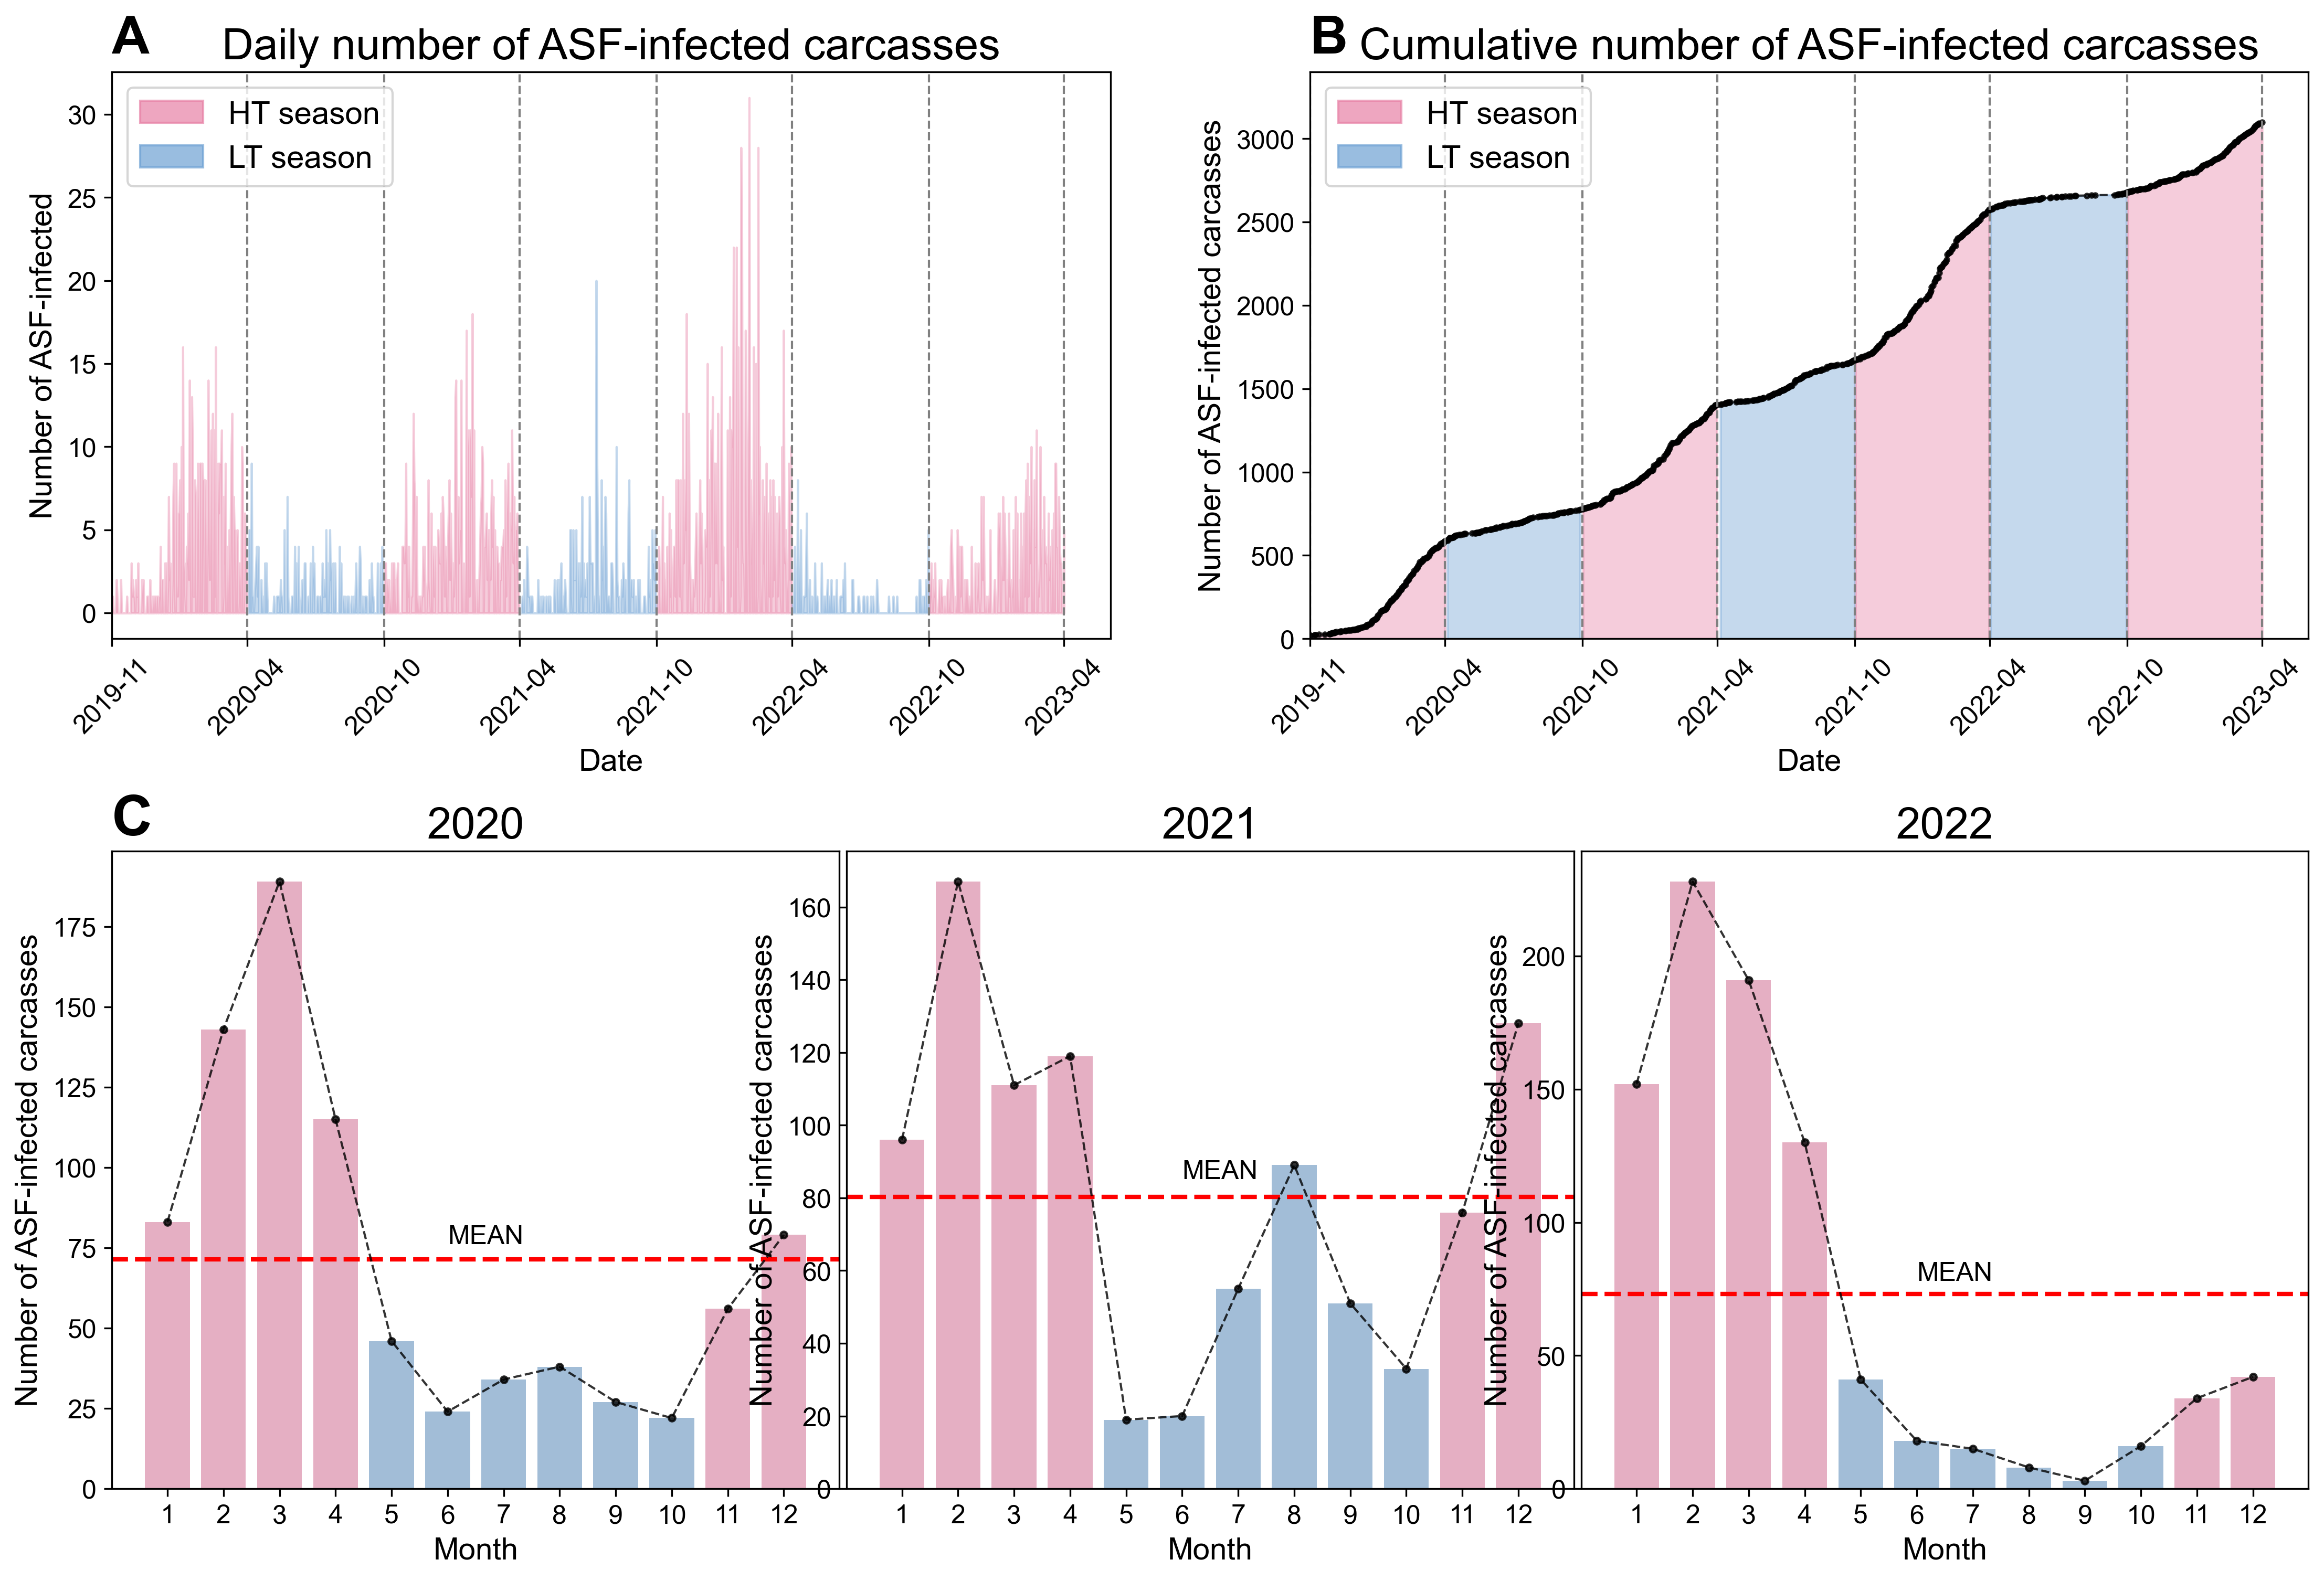

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

os.chdir("../Data")

# plot setting
plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10) 
title_size = 18
label_size = 14
point_alpha = 0.8

def assign_color(val):
    if 1 <= val <= 4 or val >= 11:
        return color_vs[0]
    else:
        return color_vs[1]

color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi=300
location = pd.read_csv('ASF_WildBoar_Update.csv')
location.loc[location['경도'].str[-2] == '.','경도'] = 128.3489
location['위도'] = location['위도'].str.replace(',', '')
location['경도'] = location['경도'].astype(float)
location['위도'] = location['위도'].astype(float)

location['확진'] = pd.to_datetime(location['확진'], format = '%Y-%m-%d')
location = location.rename(columns = {'위도' : 'y', '경도' : 'x'}, inplace  = False)

location_2019 = location.query('확진 < "2020-01-01"')
location_2020 = location.query('확진 >= "2020-01-01" & 확진 < "2021-01-01"')
location_2021 = location.query('확진 >= "2021-01-01" & 확진 < "2022-01-01"')
location_2022 = location.query('확진 >= "2022-01-01" & 확진 < "2023-01-01"')
location_2023 = location.query('확진 >= "2023-01-01" & 확진 < "2024-01-01"')

location_2020['month'] = location_2020['확진'].dt.month
location_2021['month'] = location_2021['확진'].dt.month
location_2022['month'] = location_2022['확진'].dt.month

list_2020 = location_2020.groupby('month').size()
list_2021 = location_2021.groupby('month').size()
list_2022 = location_2022.groupby('month').size()

cum_values = location.groupby('확진').size().cumsum()
cum_values_days = location.groupby('확진').size()
df_cum = pd.DataFrame({'date' : cum_values_days.index, 'value' : cum_values_days.values})
ind = pd.date_range(start = '2019-11-01', end = '2023-05-01')
test_df = pd.DataFrame({'date' : ind})
test_df = pd.merge(test_df, df_cum, left_on = 'date', right_on = 'date', how = 'left').fillna(0)
cum_values_days = test_df['value']
cum_values_days.index = test_df['date']

start_date_2019 = pd.to_datetime('2019-11-01')
end_date_2019 = pd.to_datetime('2020-04-30')

start_date_2020 = pd.to_datetime('2020-05-01')
end_date_2020 = pd.to_datetime('2020-10-31')

start_date_2020_2 = pd.to_datetime('2020-11-01')
end_date_2020_2 = pd.to_datetime('2021-04-30')

start_date_2021 = pd.to_datetime('2021-05-01')
end_date_2021 = pd.to_datetime('2021-10-31')

start_date_2021_2 = pd.to_datetime('2021-11-01')
end_date_2021_2 = pd.to_datetime('2022-04-30')

start_date_2022 = pd.to_datetime('2022-05-01')
end_date_2022 = pd.to_datetime('2022-10-31')

start_date_2022_2 = pd.to_datetime('2022-11-01')
end_date_2022_2 = pd.to_datetime('2023-04-30')

start_date_2023 = pd.to_datetime('2023-05-01')
end_date_2023 = pd.to_datetime('2023-10-31')

title_size = 20
fig = plt.figure(figsize = (18, 9), dpi = set_dpi)

gs1_nrows = 1
gs1_ncols = 2
gs1 = fig.add_gridspec(gs1_nrows, gs1_ncols, bottom = 0.6, top = 1)

ax4 = fig.add_subplot(gs1[0, 0])
ax5 = fig.add_subplot(gs1[0, 1])

ax4.set_xlim([start_date_2019, pd.to_datetime('2023-07-01')])

ax4.axvline(x = start_date_2019, color = 'gray', linestyle = '--', linewidth = 1)
ax4.axvline(x = end_date_2019, color = 'gray', linestyle = '--', linewidth = 1)
ax4.axvline(x = end_date_2020, color = 'gray', linestyle = '--', linewidth = 1)
ax4.axvline(x = end_date_2020_2, color = 'gray', linestyle = '--', linewidth = 1)
ax4.axvline(x = end_date_2021, color = 'gray', linestyle = '--', linewidth = 1)
ax4.axvline(x = end_date_2021_2, color = 'gray', linestyle = '--', linewidth = 1)
ax4.axvline(x = end_date_2022, color = 'gray', linestyle = '--', linewidth = 1)
ax4.axvline(x = end_date_2022_2, color = 'gray', linestyle = '--', linewidth = 1)
ax4.axvline(x = end_date_2023, color = 'gray', linestyle = '--', linewidth = 1)

ax4.fill_between(cum_values_days.index, cum_values_days.values, where = (cum_values_days.index >= start_date_2019) & (cum_values_days.index <= end_date_2019), color = color_vs[0], alpha = 0.4)
ax4.fill_between(cum_values_days.index, cum_values_days.values, where = (cum_values_days.index >= start_date_2020) & (cum_values_days.index <= end_date_2020), color = color_vs[1], alpha = 0.4)
ax4.fill_between(cum_values_days.index, cum_values_days.values, where = (cum_values_days.index >= start_date_2020_2) & (cum_values_days.index <= end_date_2020_2), color = color_vs[0], alpha = 0.4)
ax4.fill_between(cum_values_days.index, cum_values_days.values, where = (cum_values_days.index >= start_date_2021) & (cum_values_days.index <= end_date_2021), color = color_vs[1], alpha = 0.4)
ax4.fill_between(cum_values_days.index, cum_values_days.values, where = (cum_values_days.index >= start_date_2021_2) & (cum_values_days.index <= end_date_2021_2), color = color_vs[0], alpha = 0.4)
ax4.fill_between(cum_values_days.index, cum_values_days.values, where = (cum_values_days.index >= start_date_2022) & (cum_values_days.index <= end_date_2022), color = color_vs[1], alpha = 0.4)
ax4.fill_between(cum_values_days.index, cum_values_days.values, where = (cum_values_days.index >= start_date_2022_2) & (cum_values_days.index <= end_date_2022_2), color = color_vs[0], alpha = 0.4)
ax4.fill_between(cum_values_days.index, cum_values_days.values, where = (cum_values_days.index >= start_date_2023) & (cum_values_days.index <= end_date_2023), color = color_vs[1], alpha = 0.4)



ax4.set_xticks([start_date_2019, end_date_2019, end_date_2020, end_date_2020_2, end_date_2021, end_date_2021_2, end_date_2022, end_date_2022_2])
labels = [date.strftime('%Y-%m') for date in [start_date_2019, end_date_2019, end_date_2020, end_date_2020_2, end_date_2021, end_date_2021_2, end_date_2022, end_date_2022_2]]
ax4.set_xticklabels(labels)

ax4.set_xlabel('Date', fontsize = label_size)
ax4.set_ylabel('Number of ASF-infected', fontsize = label_size)
ax4.set_title('Daily number of ASF-infected carcasses', fontsize = title_size)

red_patch = mpatches.Patch(color=color_vs[0], label='HT season', alpha = 0.7)
blue_patch = mpatches.Patch(color=color_vs[1], label='LT season', alpha = 0.7)

ax4.legend(handles=[red_patch, blue_patch], loc='upper left', fontsize='x-large')
ax4.text(0, 1.1, 'A', transform=ax4.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')

ax4.tick_params(axis='x', rotation=45)

ax5.set_xlim([start_date_2019, pd.to_datetime('2023-07-01')])
ax5.set_ylim([0, 3400])

ax5.plot(cum_values.index, cum_values.values, color = 'black', linewidth = 1, linestyle = '--', alpha = 0.8, marker = 'o', markersize = 2)
ax5.axvline(x = start_date_2019, color = 'gray', linestyle = '--', linewidth = 1)
ax5.axvline(x = end_date_2019, color = 'gray', linestyle = '--', linewidth = 1)
ax5.axvline(x = end_date_2020, color = 'gray', linestyle = '--', linewidth = 1)
ax5.axvline(x = end_date_2020_2, color = 'gray', linestyle = '--', linewidth = 1)
ax5.axvline(x = end_date_2021, color = 'gray', linestyle = '--', linewidth = 1)
ax5.axvline(x = end_date_2021_2, color = 'gray', linestyle = '--', linewidth = 1)
ax5.axvline(x = end_date_2022, color = 'gray', linestyle = '--', linewidth = 1)
ax5.axvline(x = end_date_2022_2, color = 'gray', linestyle = '--', linewidth = 1)
ax5.axvline(x = end_date_2023, color = 'gray', linestyle = '--', linewidth = 1)

ax5.fill_between(cum_values.index, cum_values.values, where = (cum_values.index >= start_date_2019) & (cum_values.index <= end_date_2019), color = color_vs[0], alpha = 0.4)
ax5.fill_between(cum_values.index, cum_values.values, where = (cum_values.index >= start_date_2020) & (cum_values.index <= end_date_2020), color = color_vs[1], alpha = 0.4)
ax5.fill_between(cum_values.index, cum_values.values, where = (cum_values.index >= start_date_2020_2) & (cum_values.index <= end_date_2020_2), color = color_vs[0], alpha = 0.4)
ax5.fill_between(cum_values.index, cum_values.values, where = (cum_values.index >= start_date_2021) & (cum_values.index <= end_date_2021), color = color_vs[1], alpha = 0.4)
ax5.fill_between(cum_values.index, cum_values.values, where = (cum_values.index >= start_date_2021_2) & (cum_values.index <= end_date_2021_2), color = color_vs[0], alpha = 0.4)
ax5.fill_between(cum_values.index, cum_values.values, where = (cum_values.index >= start_date_2022) & (cum_values.index <= end_date_2022), color = color_vs[1], alpha = 0.4)
ax5.fill_between(cum_values.index, cum_values.values, where = (cum_values.index >= start_date_2022_2) & (cum_values.index <= end_date_2022_2), color = color_vs[0], alpha = 0.4)
ax5.fill_between(cum_values.index, cum_values.values, where = (cum_values.index >= start_date_2023) & (cum_values.index <= end_date_2023), color = color_vs[1], alpha = 0.4)



ax5.set_xticks([start_date_2019, end_date_2019, end_date_2020, end_date_2020_2, end_date_2021, end_date_2021_2, end_date_2022, end_date_2022_2])
labels = [date.strftime('%Y-%m') for date in [start_date_2019, end_date_2019, end_date_2020, end_date_2020_2, end_date_2021, end_date_2021_2, end_date_2022, end_date_2022_2]]
ax5.set_xticklabels(labels)

ax5.set_xlabel('Date', fontsize = label_size)
ax5.set_ylabel('Number of ASF-infected carcasses', fontsize = label_size)
ax5.set_title('Cumulative number of ASF-infected carcasses', fontsize = title_size)

red_patch = mpatches.Patch(color=color_vs[0], label='HT season', alpha = 0.7)
blue_patch = mpatches.Patch(color=color_vs[1], label='LT season', alpha = 0.7)

ax5.legend(handles=[red_patch, blue_patch], loc='upper left', fontsize='x-large')
ax5.text(1.2, 1.1, 'B', transform=ax4.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')
ax5.tick_params(axis='x', rotation=45)

gs2_nrows = 1
gs2_ncols = 3
gs2 = fig.add_gridspec(gs2_nrows, gs2_ncols, bottom = 0, top = 0.45, wspace=0.01)
ax1 = fig.add_subplot(gs2[0, 0])
ax2 = fig.add_subplot(gs2[0, 1])
ax3 = fig.add_subplot(gs2[0, 2])

red_patch = mpatches.Patch(color=color_vs[0], label='HT season', alpha = 0.7)
blue_patch = mpatches.Patch(color=color_vs[1], label='LT season', alpha = 0.7)

sns.barplot(x = list_2020.index, y = list_2020.values, ax = ax1, palette = [assign_color(i) for i in list_2020.index], alpha = 0.7)
ax1.axhline(y = np.mean(list_2020.values), color = 'red', linestyle = '--', linewidth = 2)
ax1.plot(list_2020.index-1, list_2020.values, color='black', linewidth=1, linestyle='--', alpha=0.8, marker = 'o', markersize = 3)
ax1.text(5, np.mean(list_2020.values) + 5, 'MEAN', fontsize=12)
ax1.set_xlabel('Month', fontsize = label_size)
ax1.set_ylabel('Number of ASF-infected carcasses', fontsize = label_size)
ax1.set_title('2020', fontsize = title_size)
ax1.text(0, -0.275, 'C', transform=ax4.transAxes, fontsize=26, fontweight='bold', va='top', ha='left')

sns.barplot(x = list_2021.index, y = list_2021.values, ax = ax2, palette = [assign_color(i) for i in list_2021.index], alpha = 0.7)
ax2.axhline(y = np.mean(list_2021.values), color = 'red', linestyle = '--', linewidth = 2)
ax2.plot(list_2021.index-1, list_2021.values, color='black', linewidth=1, linestyle='--', alpha=0.8, marker = 'o', markersize = 3)
ax2.text(5, np.mean(list_2021.values) + 5, 'MEAN', fontsize=12)
ax2.set_xlabel('Month', fontsize = label_size)
ax2.set_ylabel('Number of ASF-infected carcasses', fontsize = label_size)
ax2.set_title('2021', fontsize = title_size)

sns.barplot(x = list_2022.index, y = list_2022.values, ax = ax3, palette = [assign_color(i) for i in list_2022.index], alpha = 0.7)
ax3.axhline(y = np.mean(list_2022.values), color = 'red', linestyle = '--', linewidth = 2)
ax3.plot(list_2022.index-1, list_2022.values, color='black', linewidth=1, linestyle='--', alpha=0.8, marker = 'o', markersize = 3)
ax3.text(5, np.mean(list_2022.values) + 5, 'MEAN', fontsize=12)
ax3.set_xlabel('Month', fontsize = label_size)
ax3.set_ylabel('Number of ASF-infected carcasses', fontsize = label_size)
ax3.set_title('2022', fontsize = title_size)

plt.tight_layout()
plt.show()